# Topic 29: Decision Trees

In [ ]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Users/melod/anaconda3/envs/learn-env/library/bin/graphviz'

# Regression Tree

In [4]:
choco upgrade graphviz --pre 

SyntaxError: invalid syntax (<ipython-input-4-2805c237f60e>, line 1)

In [1]:
# implementing the tree using scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.datasets as datasets
# from sklearn.externals.six import StringIO
import six
from IPython.display import Image  
from sklearn.tree import export_graphviz
from dtreeviz.trees import dtreeviz
import graphviz
# import pydotplus
from sklearn.metrics import mean_squared_error, accuracy_score
df = pd.read_csv("resources/hitters.csv")
df.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [2]:
df = df[['Hits','Years','Salary']].dropna(axis = 0)
df

,Hits,Years,Salary
1,81,14,475.0
2,130,3,480.0
3,141,11,500.0
4,87,2,91.5
5,169,11,750.0
...,...,...,...
317,127,5,700.0
318,136,12,875.0
319,126,6,385.0
320,144,8,960.0


In [3]:
# define dependent/independent variables

X = df[['Hits','Years']]

y = df.Salary


In [4]:
# splitting the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [5]:
# instantiate a regression instance
regTree = DecisionTreeRegressor(max_depth = 5)

# fit the tree
regTree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

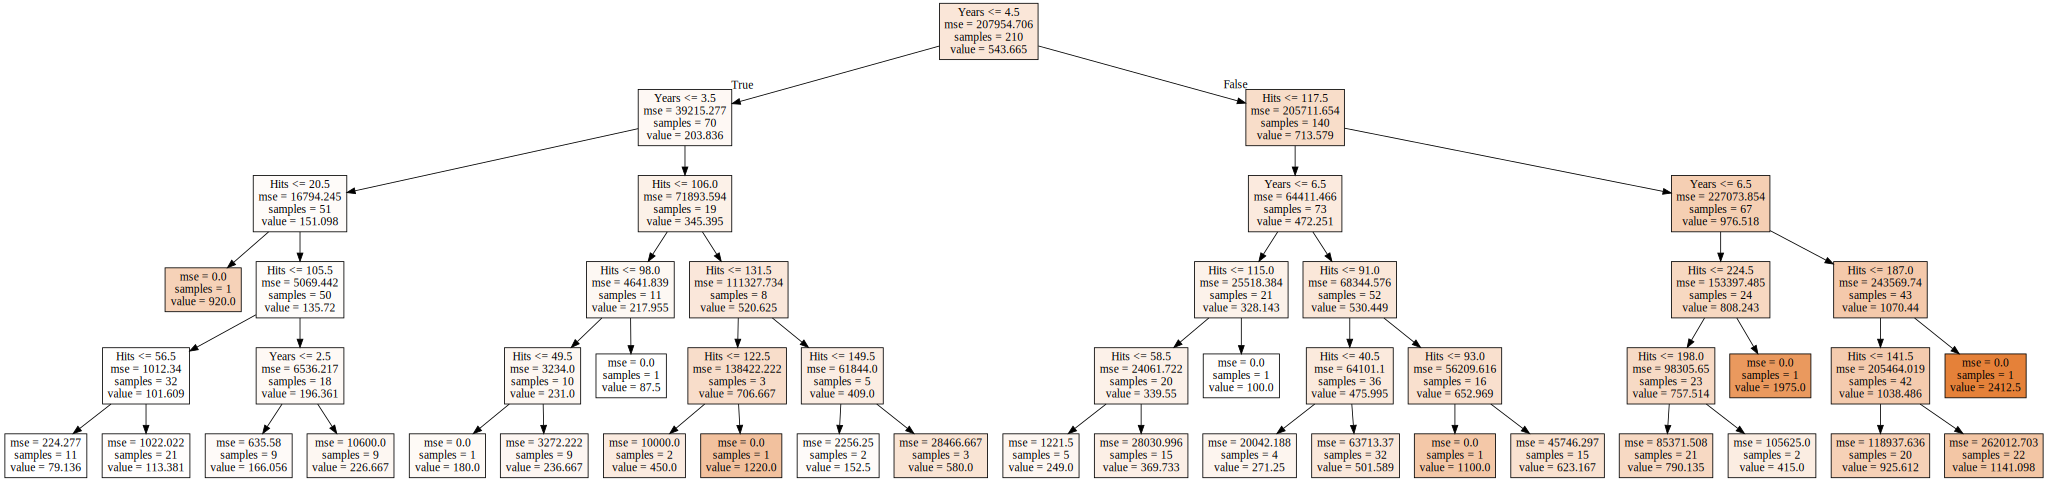

In [9]:
# visualizing the regression tree

dot_data = tree.export_graphviz(regTree, out_file=None,
                                feature_names=X_train.columns,  
                                class_names=['Salary'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# dot_data = six.StringIO()
# export_graphviz(regTree, out_file=dot_data,  
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())
# viz = dtreeviz(regTree,X_train,y_train,feature_names=X_train.columns,target_name='Salary', class_names=['Salary'])
# viz

In [ ]:
# use the model to predict the testing and compare mse
regPred = regTree.predict(X_test)

In [ ]:
# comparing the results and plot them 
mse = mean_squared_error(regPred, y_test)
rmse = mse**0.5
print('mse: ', mse, ' rmse: ', rmse)

## Pruning

- The best option to tune hyperparameter `max_depth` is to grow the tree very deep and prune it back to a _subtree_ by using cross-validation to find the lowest possible MSE, visualized with a __validation curve__ 

In [ ]:
depth_range = range(1,10)

# save our MSE values
mse = []

for depth in depth_range:
    regtree = DecisionTreeRegressor(max_depth = depth) # train a tree for each depth
    depth_score = cross_val_score(regtree, X, y, scoring = 'neg_mean_squared_error', cv = 6)
    mse.append(depth_score.mean())
print(mse)

mse = [abs(number) for number in mse]
plt.figure(figsize = (10,10))
plt.plot(depth_range, mse)
plt.xlabel('range of depth')
plt.ylabel('mse')
plt.show()

# Classification Tree
Classification tree is very similar to regression tree--we use binary and recursive splitting in the feature space to group similar observations into regions. The difference is classification tree predict a **qualitative, or categorical** outcome.

We predict that each observation belongs to the most ___commonly occuring class___ of training observations in the region it belongs to. 

In [ ]:
iris=datasets.load_iris()
X_iris=pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris=iris.target

In [ ]:
# visualizing the iris dataset 
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = X_iris['petal width (cm)'], y = X_iris['petal length (cm)'], hue = iris.target)

In [ ]:
X_train_iris,X_test_iris,y_train_iris,y_test_iris = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 42)



In [ ]:
ctree=DecisionTreeClassifier(max_depth = 2)
ctree.fit(X_train_iris,y_train_iris)

In [ ]:
dot_data = StringIO()
export_graphviz(ctree, out_file=dot_data,  
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
clasPred = ctree.predict(X_test_iris)

In [ ]:

accuracy_score(y_test_iris, clasPred)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(ctree,X_test_iris,y_test_iris)

The ‘value’ row in each node tells us how many of the observations that were sorted into that node fall into each of our three categories. We can see that our feature X2, which is the petal length, was able to completely distinguish one species of flower (Iris-Setosa) from the rest.

In [ ]:
score = cross_val_score(ctree, X_iris, y_iris, cv = 10)
score.mean()
depth_range = range(1,10)
val = []
for depth in depth_range:
    ctree = DecisionTreeClassifier(max_depth = depth)
    depth_score = cross_val_score(ctree, X_iris, y_iris, cv = 10)
    val.append(depth_score.mean())
print(val)
plt.figure(figsize = (10,10))
plt.plot(depth_range, val)
plt.xlabel('range of depth')
plt.ylabel('cross validated values')
plt.show()

# Resources

### sklearn documentation on trees
- regressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- classifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### videos
- StatQuest Decision Trees: https://www.youtube.com/watch?v=7VeUPuFGJHk&t=190s
- StatQuest Decision Trees 2: https://www.youtube.com/watch?v=wpNl-JwwplA
- StatQuest Regressor Trees: https://www.youtube.com/watch?v=g9c66TUylZ4
- StatQuest Pruning Regressor Trees: https://www.youtube.com/watch?v=D0efHEJsfHo&t=10s

### best textbooks
- Introduction to Statistical Learning: http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf
- ISLR video series https://www.youtube.com/user/dataschool/playlists?view=50&sort=dd&shelf_id=4
- Elements of Statistical Learning (more mathy): https://web.stanford.edu/~hastie/Papers/ESLII.pdf